# Titanic Classification

Problem: Titanic Classification:
        
We have to make a system which tells whether the person will be save from sinking. What factors were most likely lead to success-socio-ecomonic status, age, gender and more.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We  have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

# Exploratory Data Analysis EDA

In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

As we are getting info from above there are multi types columns.

<Axes: >

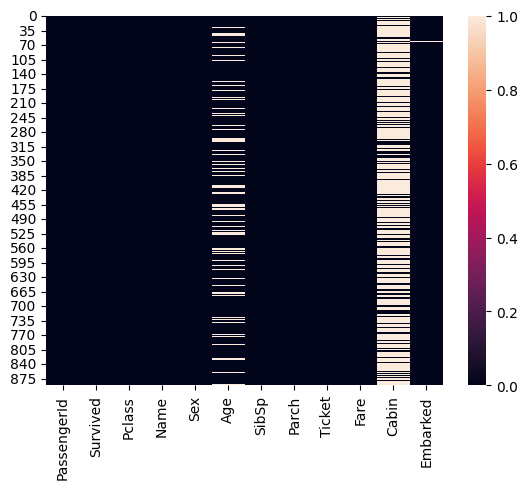

In [4]:
sns.heatmap(df.isnull())

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing value are present in our dataset.

In [6]:
pd.concat({'unique values': df.apply(pd.unique), 'number of unique values': df.nunique()}, axis=1)

,unique values,number of unique values
PassengerId,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",891
Survived,"[0, 1]",2
Pclass,"[3, 1, 2]",3
Name,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B...",891
Sex,"[male, female]",2
Age,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...",88
SibSp,"[1, 0, 3, 4, 2, 5, 8]",7
Parch,"[0, 1, 2, 5, 3, 4, 6]",7
Ticket,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803...",681
Fare,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....",248


Checking whole columns unique value.

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Statistical Evaluation of dataset

# Data Cleaning

In [8]:
df=df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1)

Droping above mentioned columns because they are categorical columns and not related with prediction.

In [9]:
def clean(df):
    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        df[col].fillna(df[col].median(), inplace=True)
        
    df.Embarked.fillna("U", inplace=True)
    return df
df = clean(df)

Removing Missing value from all columns and replace "U" with Embarked column NaN value. 

# Univariate Analysis

# Ploting Outliers by Box Plot

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.columns

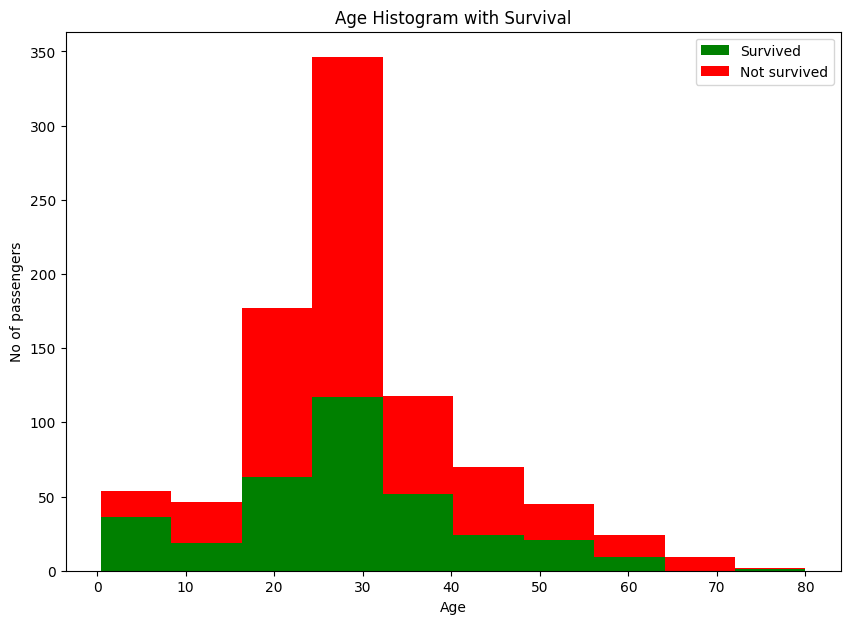

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

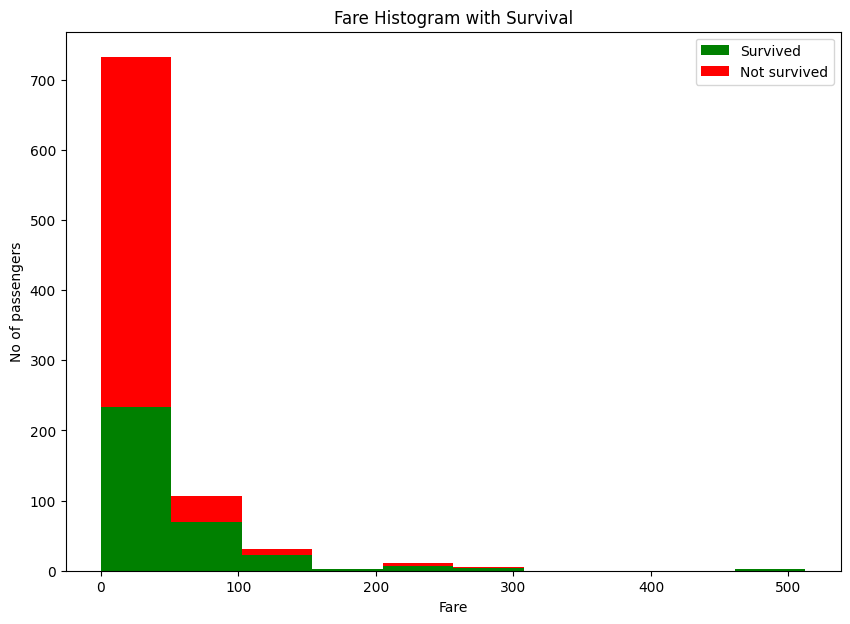

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

<Axes: xlabel='Sex', ylabel='count'>

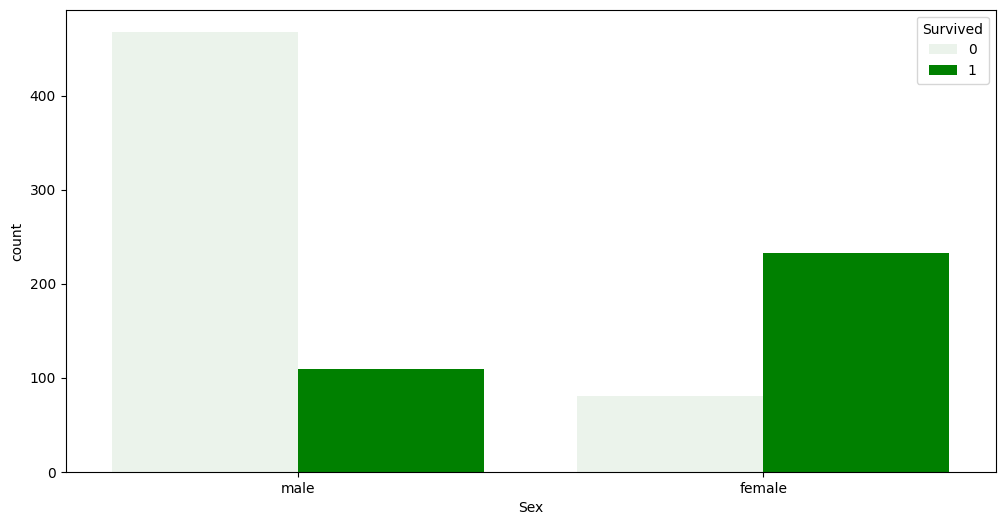

In [25]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Sex' , hue = 'Survived' , data = df , dodge = True , color = 'Green' , saturation = 1)

<Axes: xlabel='SibSp', ylabel='count'>

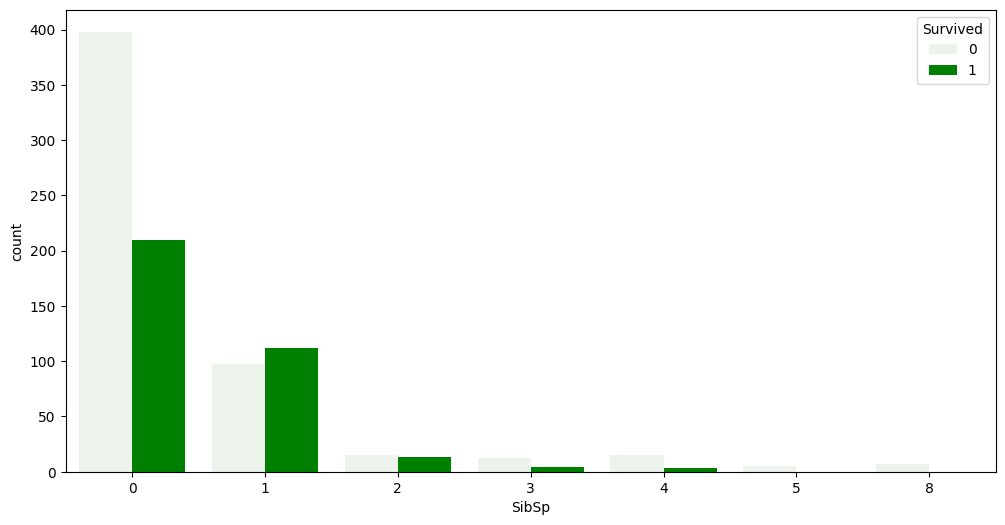

In [26]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'SibSp' , hue = 'Survived' , data = df , dodge = True , color = 'Green' , saturation = 1)

In [18]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<Axes: xlabel='Parch', ylabel='count'>

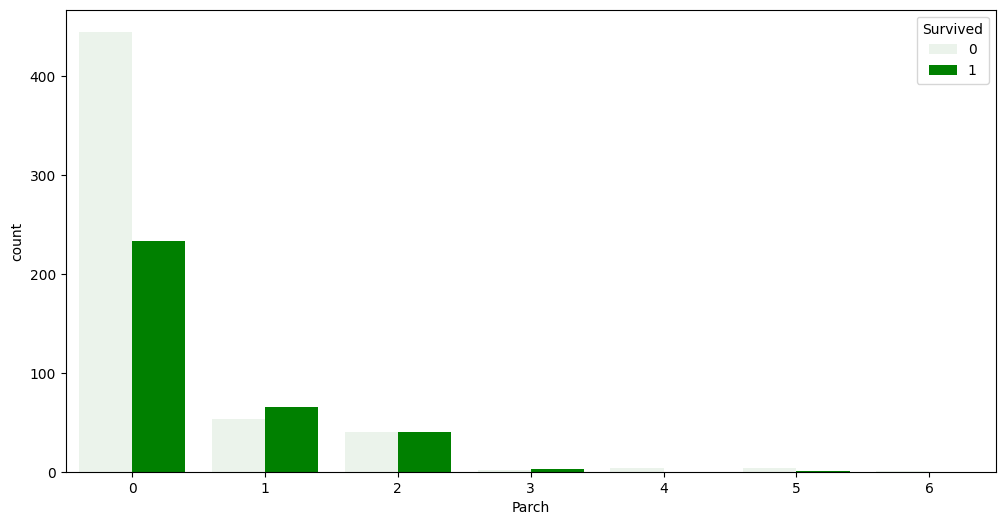

In [27]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Parch' , hue = 'Survived' , data = df , dodge = True , color = 'Green' , saturation = 1)

# Data Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df['Embarked'] = labelencoder.fit_transform(df['Embarked'])
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,28.0,0,0,8.4583,1
6,0,1,1,54.0,0,0,51.8625,2
7,0,3,1,2.0,3,1,21.0750,2
8,1,3,0,27.0,0,2,11.1333,2
9,1,2,0,14.0,1,0,30.0708,0


# Correlation

<Axes: >

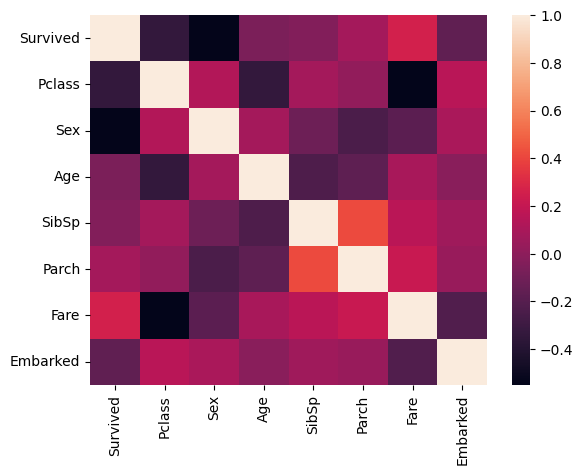

In [29]:
dfcor=df.corr()
dfcor
sns.heatmap(dfcor)

<Axes: >

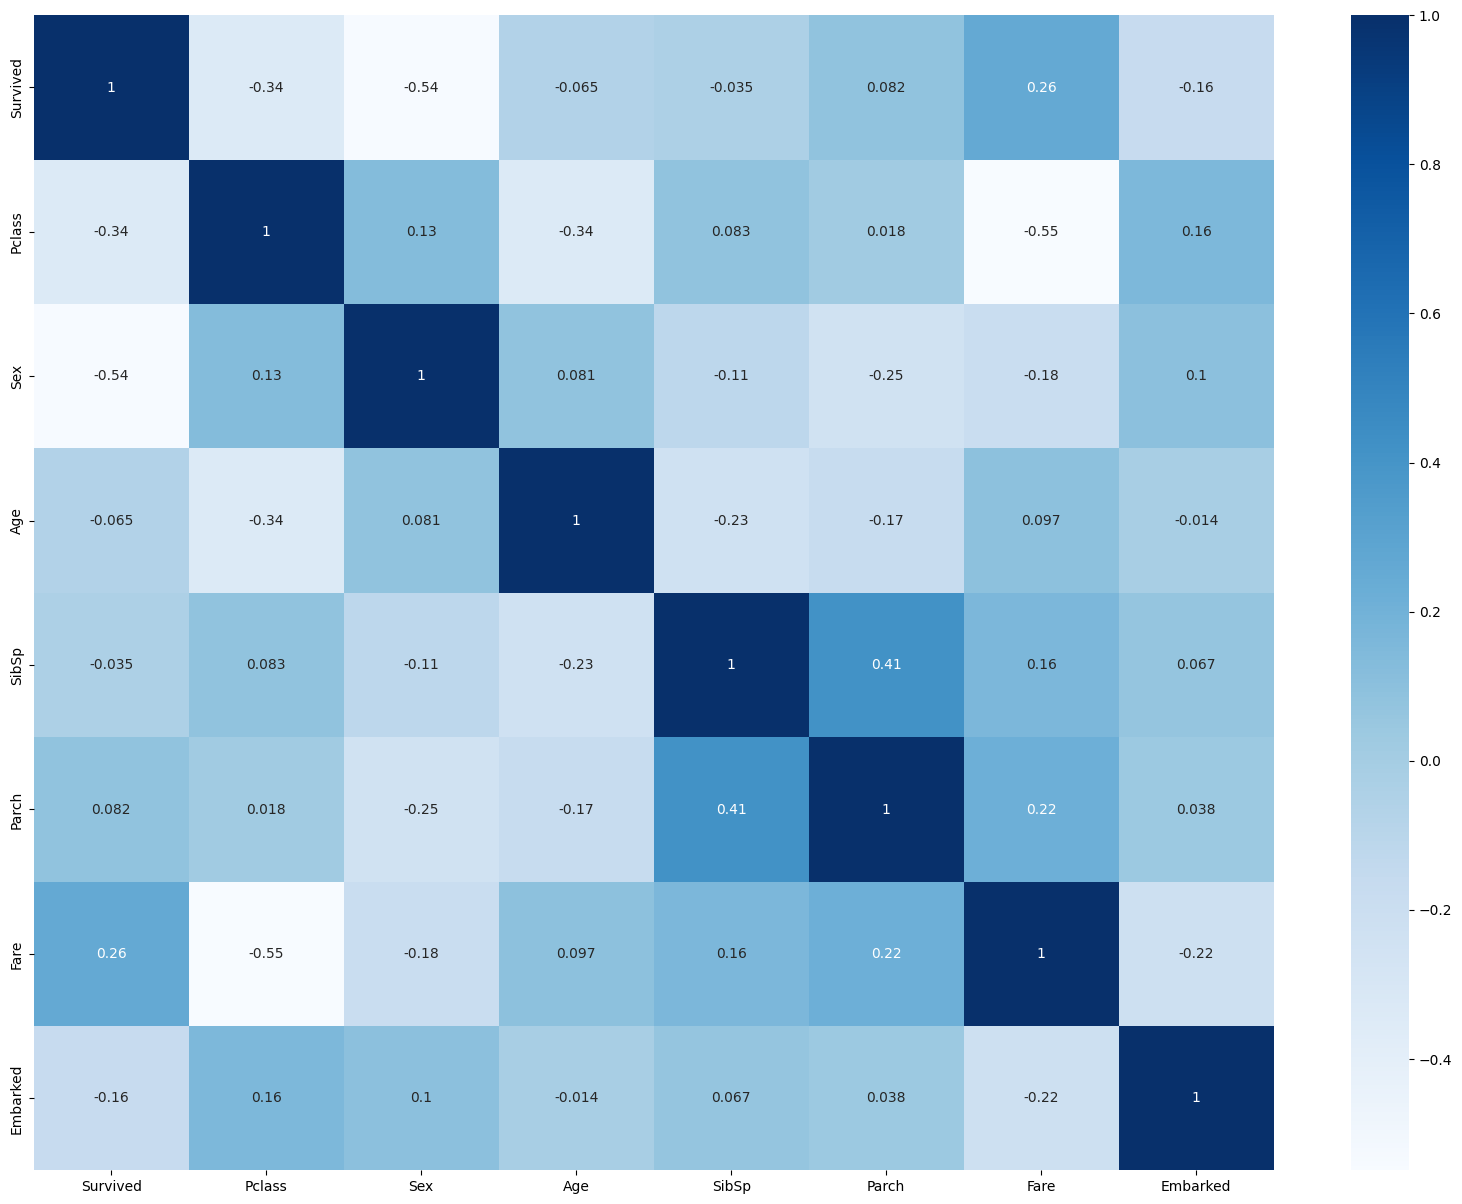

In [30]:
plt.figure(figsize=(20,15))
sns.heatmap(dfcor,cmap='Blues',annot=True)

In [31]:
collist=df.columns.values
ncol=12
nrows=10

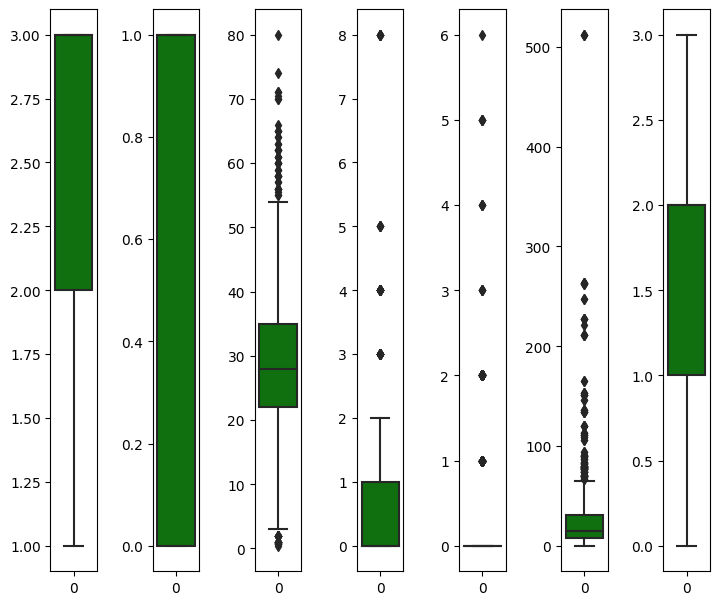

In [32]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green', orient='v')
    plt.tight_layout()

# Zscore Value

In [33]:
from scipy.stats import zscore

In [34]:
z=np.abs(zscore(df))
z

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.789272,0.827377,0.737695,0.565736,0.432793,0.473674,0.502445,0.581114
1,1.266990,1.566107,1.355574,0.663861,0.432793,0.473674,0.786845,1.938460
2,1.266990,0.827377,1.355574,0.258337,0.474545,0.473674,0.488854,0.581114
3,1.266990,1.566107,1.355574,0.433312,0.432793,0.473674,0.420730,0.581114
4,0.789272,0.827377,0.737695,0.433312,0.474545,0.473674,0.486337,0.581114
...,...,...,...,...,...,...,...,...
886,0.789272,0.369365,0.737695,0.181487,0.474545,0.473674,0.386671,0.581114
887,1.266990,1.566107,1.355574,0.796286,0.474545,0.473674,0.044381,0.581114
888,0.789272,0.827377,1.355574,0.104637,0.432793,2.008933,0.176263,0.581114
889,1.266990,1.566107,0.737695,0.258337,0.474545,0.473674,0.044381,1.938460


Applying Zscore value on entire data for removing outliters from data.

In [35]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


Set Threshold point to data.

In [38]:
Df=df[(z<3).all(axis=1)]
Df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


With the help of above functionality we are trying to get all the values that is equal or below from threshold point.

In [39]:
df.shape

(891, 8)

In [41]:
(71/891)*100

7.968574635241302

After using Zscore functionality we are loosing 8% approx of data but it is ok.

# Spliting All data into X and Y(Target Variable).

In [42]:
x=Df.drop('Survived',axis=1)
y=Df['Survived']

# Data Imbalance

In [44]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [45]:
Df['Survived'].value_counts()

Survived
0    500
1    320
Name: count, dtype: int64

In [46]:
(180/500)*100

36.0

As we are getting from above coutplot or from above command the data is approx equal so there is no need to use  Imbalance functionality.

# Data Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dx=sc.fit_transform(x)
dx=pd.DataFrame(dx,columns=x.columns)
dx

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.833995,0.722036,-0.611926,1.051956,-0.451141,-0.623707,0.577898
1,-1.586804,-1.384973,0.703210,1.051956,-0.451141,1.525109,-1.949444
2,0.833995,-1.384973,-0.283142,-0.563407,-0.451141,-0.601055,0.577898
3,-1.586804,-1.384973,0.456622,1.051956,-0.451141,0.914918,0.577898
4,0.833995,0.722036,0.456622,-0.563407,-0.451141,-0.596861,0.577898
...,...,...,...,...,...,...,...
815,-0.376405,0.722036,-0.200946,-0.563407,-0.451141,-0.430749,0.577898
816,-1.586804,-1.384973,-0.858515,-0.563407,-0.451141,0.139733,0.577898
817,0.833995,-1.384973,-0.118750,1.051956,3.088912,-0.080071,0.577898
818,-1.586804,0.722036,-0.283142,-0.563407,-0.451141,0.139733,-1.949444


We are Scaling all Independent variable with the help of Standard Scaler.

In [48]:
X=dx

In [49]:
#Spliting the all data into X and y for model building

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Spliting X and y into Train data and Test data for model building.

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=42)

# Model Building

# Linear Support Vector Classifier

In [52]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train.ravel())
predsvc=clf.predict(X_test)        
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8376383763837638
[[154  19]
 [ 25  73]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       173
           1       0.79      0.74      0.77        98

    accuracy                           0.84       271
   macro avg       0.83      0.82      0.82       271
weighted avg       0.84      0.84      0.84       271



Linear Support Vector Classifier Algorithm performing very good and the score is 83%

# Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=None)
dtc.fit(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8191881918819188
[[146  27]
 [ 22  76]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       173
           1       0.74      0.78      0.76        98

    accuracy                           0.82       271
   macro avg       0.80      0.81      0.81       271
weighted avg       0.82      0.82      0.82       271



Decision Tree Classifier Algorithm performing very good and the score is 83%

# KNeighbors Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,weights='distance', algorithm='brute')
knn.fit(X_train,y_train)
predknn=knn.predict(X_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8118081180811808
[[152  21]
 [ 30  68]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       173
           1       0.76      0.69      0.73        98

    accuracy                           0.81       271
   macro avg       0.80      0.79      0.79       271
weighted avg       0.81      0.81      0.81       271



KNeighbors Classifier Algorithm performing very good and the score is 81%

# AdaBoost Classifier

In [55]:
ad=AdaBoostClassifier(base_estimator=None,n_estimators=50, algorithm='SAMME')
ad.fit(X_train,y_train) 
predad=ad.predict(X_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8302583025830258
[[151  22]
 [ 24  74]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       173
           1       0.77      0.76      0.76        98

    accuracy                           0.83       271
   macro avg       0.82      0.81      0.82       271
weighted avg       0.83      0.83      0.83       271



AdaBoost Classifier Algorithm performing very good and the score is 83%

# Random Forest Classifier

In [56]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
predrf=rf.predict(X_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8523985239852399
[[156  17]
 [ 23  75]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       173
           1       0.82      0.77      0.79        98

    accuracy                           0.85       271
   macro avg       0.84      0.83      0.84       271
weighted avg       0.85      0.85      0.85       271



Random Forest Classifier Algorithm performing very good and the score is 85%

# Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
clf=cross_val_score(clf,X,y,cv=5)
print("Cross Validation Score of LinearSVC:",clf.mean())

Cross Validation Score of LinearSVC: 0.7914634146341463


In [59]:
dtc=cross_val_score(dtc,X,y,cv=5)
print("Cross Validation Score of DTC:",dtc.mean())

Cross Validation Score of DTC: 0.774390243902439


In [60]:
knn=cross_val_score(knn,X,y,cv=5)
print("Cross Validation Score of KNN:",knn.mean())

Cross Validation Score of KNN: 0.7829268292682927


In [61]:
ad=cross_val_score(ad,X,y,cv=5)
print("Cross Validation Score of AdaBoostClassifier:",ad.mean())

Cross Validation Score of AdaBoostClassifier: 0.7829268292682927


In [62]:
rf=cross_val_score(rf,X,y,cv=5)
print("Cross Validation Score of rf:",rf.mean())

Cross Validation Score of rf: 0.7951219512195122


# Hyper parameter tuning

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
knn = KNeighborsClassifier()
grid_parameters = {'weights':['uniform','distance'],'algorithm':['brute']}
grid_sr = GridSearchCV(estimator=knn,param_grid=grid_parameters,scoring='accuracy', cv=5)
grid_sr.fit(X_train, y_train)
best_parameters=grid_sr.best_params_
best_result=grid_sr.best_score_
best_model = grid_sr.best_estimator_
print(best_result)
print(best_model)

0.7633527939949959
KNeighborsClassifier(algorithm='brute', weights='distance')


# Evaluation Metrics

In [65]:
#Import ROC_Curve.
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [66]:
#Import ROC_AUC_SCORE.


In [67]:
y_pred_prob=best_model.predict_proba(X_test)[:,1]
y_pred_prob

array([1.66666703e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.39425051e-01, 9.47078655e-01, 0.00000000e+00, 2.05786205e-01,
       8.11702668e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.13253333e-01, 0.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 8.11144563e-01, 7.51253596e-01,
       0.00000000e+00, 3.90553953e-01, 0.00000000e+00, 1.00000000e+00,
       2.00954560e-01, 1.00000000e+00, 3.79959813e-01, 9.66770697e-02,
       1.00000000e+00, 5.68401846e-01, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 2.92965852e-01, 8.94075098e-01,
       3.91161789e-01, 2.05817414e-01, 2.65072340e-01, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.32093999e-01,
       7.16811689e-01, 6.71115044e-01, 1.98791996e-01, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.18994076e-01,
       1.75682133e-01, 8.12997731e-02, 8.18202400e-01, 0.00000000e+00,
      

In [68]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [69]:
fpr

array([0.        , 0.01734104, 0.02312139, 0.02312139, 0.02890173,
       0.02890173, 0.03468208, 0.03468208, 0.04624277, 0.04624277,
       0.06358382, 0.06358382, 0.06936416, 0.06936416, 0.07514451,
       0.07514451, 0.08092486, 0.08092486, 0.0867052 , 0.0867052 ,
       0.09248555, 0.09248555, 0.10404624, 0.10404624, 0.10982659,
       0.10982659, 0.11560694, 0.11560694, 0.12138728, 0.12138728,
       0.13294798, 0.13294798, 0.15028902, 0.15028902, 0.15606936,
       0.15606936, 0.17919075, 0.17919075, 0.19653179, 0.19653179,
       0.20809249, 0.20809249, 0.21387283, 0.21387283, 0.23699422,
       0.23699422, 0.24277457, 0.24277457, 0.26011561, 0.26011561,
       0.28323699, 0.30057803, 0.32369942, 0.32369942, 0.33526012,
       0.33526012, 0.41040462, 0.41040462, 0.42774566, 0.43930636,
       0.43930636, 0.45086705, 0.4566474 , 0.48554913, 0.49710983,
       1.        ])

In [70]:
tpr

array([0.        , 0.40816327, 0.40816327, 0.41836735, 0.41836735,
       0.42857143, 0.42857143, 0.44897959, 0.44897959, 0.45918367,
       0.45918367, 0.5       , 0.5       , 0.52040816, 0.52040816,
       0.59183673, 0.59183673, 0.60204082, 0.60204082, 0.6122449 ,
       0.6122449 , 0.62244898, 0.62244898, 0.65306122, 0.65306122,
       0.66326531, 0.66326531, 0.68367347, 0.68367347, 0.69387755,
       0.69387755, 0.70408163, 0.70408163, 0.73469388, 0.73469388,
       0.75510204, 0.75510204, 0.76530612, 0.76530612, 0.78571429,
       0.78571429, 0.79591837, 0.79591837, 0.81632653, 0.81632653,
       0.82653061, 0.82653061, 0.83673469, 0.83673469, 0.84693878,
       0.84693878, 0.84693878, 0.84693878, 0.85714286, 0.85714286,
       0.86734694, 0.86734694, 0.8877551 , 0.8877551 , 0.8877551 ,
       0.89795918, 0.89795918, 0.90816327, 0.90816327, 0.90816327,
       1.        ])

In [71]:
thresholds

array([           inf, 1.00000000e+00, 9.99999860e-01, 9.99849519e-01,
       9.97860830e-01, 9.83614567e-01, 9.55408619e-01, 9.47068710e-01,
       9.16147487e-01, 8.97542614e-01, 8.46545442e-01, 8.25236121e-01,
       8.18202400e-01, 8.11144563e-01, 8.10448851e-01, 7.30485821e-01,
       7.16811689e-01, 7.07949378e-01, 6.71115044e-01, 6.67956113e-01,
       6.29691283e-01, 6.14264346e-01, 6.03191083e-01, 5.65579077e-01,
       5.58737615e-01, 5.50845501e-01, 5.38254973e-01, 5.18321149e-01,
       5.17546679e-01, 5.17114801e-01, 4.78578355e-01, 4.75931195e-01,
       4.49707164e-01, 4.32093999e-01, 4.29507065e-01, 4.18568150e-01,
       3.81811974e-01, 3.80075032e-01, 3.61932146e-01, 3.45843519e-01,
       3.37204350e-01, 3.35535057e-01, 3.29072298e-01, 3.18994076e-01,
       2.86044628e-01, 2.65072340e-01, 2.59459138e-01, 2.16604194e-01,
       2.05817414e-01, 2.05786205e-01, 2.00461655e-01, 2.00000000e-01,
       1.94699884e-01, 1.93698871e-01, 1.89124030e-01, 1.85247257e-01,
      

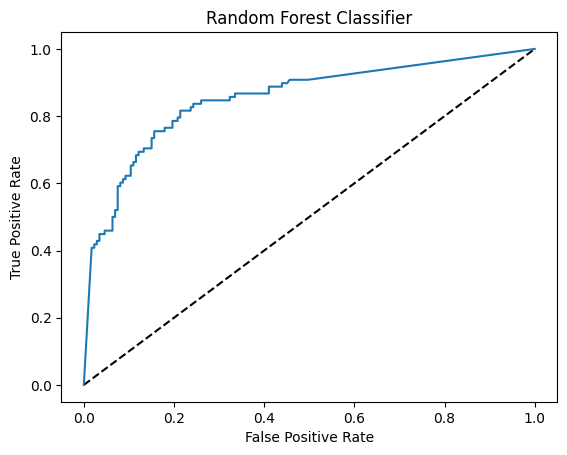

In [72]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [73]:
auc_score=roc_auc_score(y_test,best_model.predict(X_test))
print(auc_score)

0.7862451338917069


The Score of AUC_RUC_Curve is 78%.

# Saving Model

In [79]:
import joblib
joblib.dump(knn,'TitanicModel.obj')

['TitanicModel.obj']

The KNeighbors Classifier algorithm performing Very good and AUC Score is 78% approx that is very good score.

# End............